#### A1. Research Question

Is there a significant difference in the monthly charges between customers who churn and those who do not churn?

#### A2. Benefits to Stakeholders

Benefits: Analyzing the data to answer this question can provide valuable insights for the organization's stakeholders. For example:

*    Management can understand the impact of pricing on customer retention and make informed decisions about pricing strategies.
*    Marketing can identify segments at higher risk of churning and target them with promotional offers.
*    Customer Service can prioritize engagement with customers who have higher monthly charges and might be at risk of churning.
*    Product Development can use these insights to tailor service offerings that might better meet the needs of different customer segments and thus reduce churn.

#### A3. Relevant Data

The below are the relevant variables for my research question:

* Churn (Qualitative): Churn status. Example: ‘No’
* InternetService (Qualitative): Type of internet service. Example: ‘Fiber Optic’
* MonthlyCharge (Quantitative): Monthly charge. Example: 171.449762
* Bandwidth_GB_Year (Quantitative): Annual bandwidth usage. Example: 904.536110

#### B1 Analysus of Variables

In [9]:
# see attach codes

import pandas as pd
from scipy import stats

# Load the dataset
df = pd.read_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D207\churn_clean.csv')

# Grouping data by churn status and extracting monthly charges
churned = df[df['Churn'] == 'Yes']['MonthlyCharge']
not_churned = df[df['Churn'] == 'No']['MonthlyCharge']

# Performing a t-test
statistic, pvalue = stats.ttest_ind(churned, not_churned, equal_var=False)

# Printing the results
print(f"T-test: Statistic={statistic}, p-value={pvalue}")

# D207 T-Test-Python-pdf. (2023)

T-test: Statistic=39.28778644007045, p-value=1.7823941678632952e-290


#### B2 Analyis Results

The T-test results yielded a statistic of approximately 39.29 and a p-value of 1.78e-290, indicating a statistically significant difference in monthly charges between the two groups.

#### B3 Justification for Analysis Technique

A T-test was selected for this analysis as it is appropriate for comparing the means of two independent samples. In this case, it helps us determine if the monthly charges for churned customers significantly differ from those who didn't churn. I believe that this is crucial for understanding factors influencing customer churn.

#### C1 Univariate Statistics of Continuous and Categorical Variables

['Fiber Optic' 'DSL' 'None']


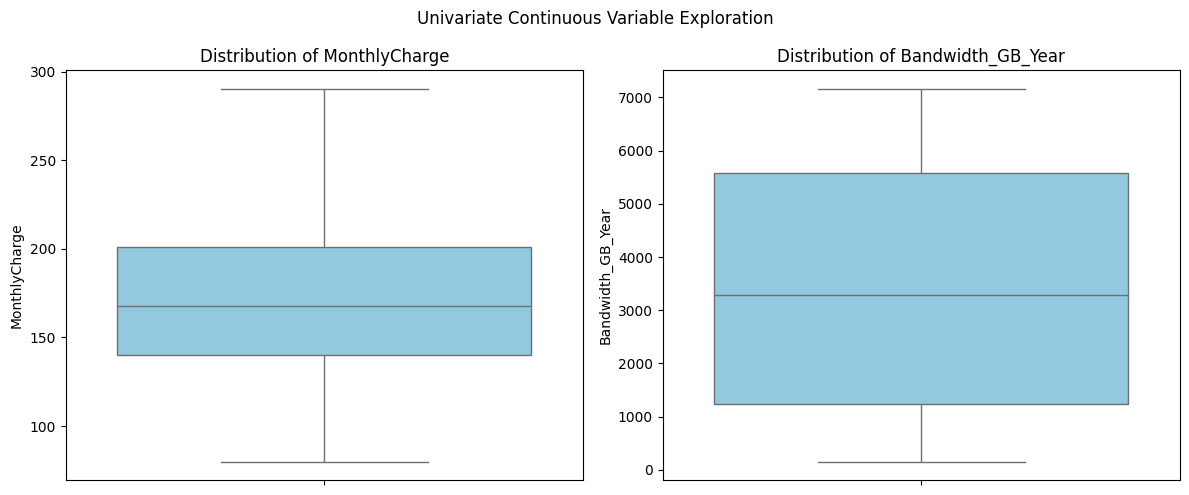

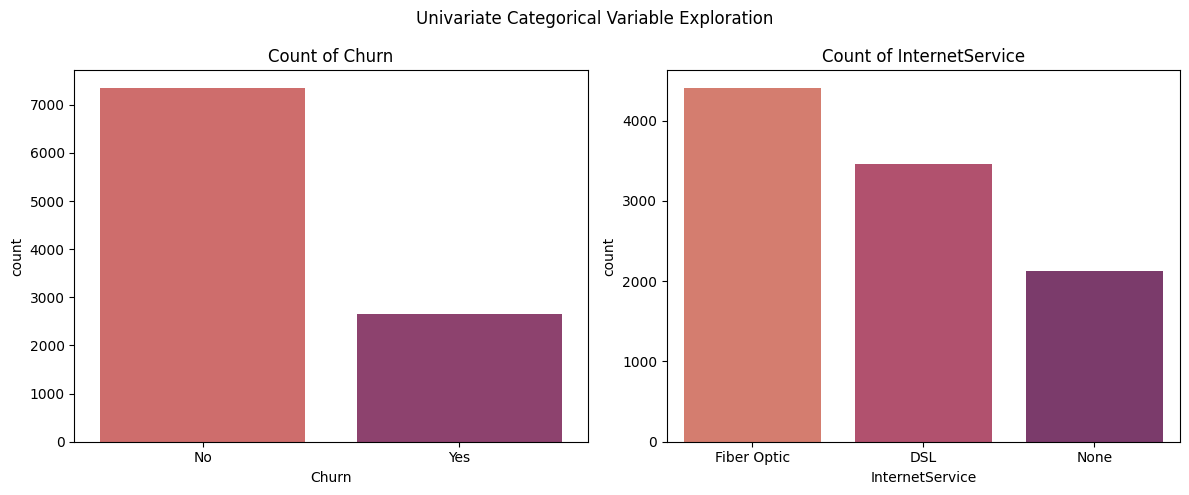

In [10]:
# see attached codes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D207\churn_clean.csv')

# Replace 'nan' with 'None' in the 'InternetService' column
df['InternetService'] = df['InternetService'].fillna('None')

# Checking for unique values in the 'InternetService' column to verify the presence of 'None'
unique_internet_services = df['InternetService'].unique()
print(unique_internet_services)

# Selecting two continuous and two categorical variables for univariate analysis
continuous_vars = ['MonthlyCharge', 'Bandwidth_GB_Year']
categorical_vars = ['Churn', 'InternetService']

# Define the color palette for the plots from seaborn
color_palette = "flare"  

# Plotting boxplots for continuous variables
plt.figure(figsize=(12, 5))
plt.suptitle("Univariate Continuous Variable Exploration")

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[var], color='skyblue')
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

# Plotting count plots for categorical variables with the new color palette
plt.figure(figsize=(12, 5))
plt.suptitle("Univariate Categorical Variable Exploration")

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=var, data=df, hue=var, palette=color_palette, legend=False)
    plt.title(f'Count of {var}')

plt.tight_layout()
plt.show()


# Sewell, W. (2023)



The above plots shows a distributions of a variable from the Churn dataset. These plots cover 4 variables:


*    'MonthlyCharge' (continuous)
*    'Bandwidth_GB_Year' (continuous)
*    'Churn' (categorical)
*    'InternetService' (categorical)



In [11]:
df.Churn.value_counts()

Churn
No     7350
Yes    2650
Name: count, dtype: int64

In [12]:
df.InternetService.value_counts().sort_index()

InternetService
DSL            3463
Fiber Optic    4408
None           2129
Name: count, dtype: int64

In [13]:
df.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [14]:
df.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

#### Continuous Variables: MonthlyCharge and Bandwidth_GB_Year

* The boxplot for MonthlyCharge shows a median charge of around $175 and presents a symmetrical distribution which. The visual could be indicative of a normal distribution based on our customer base. However, there are a few outliers with significantly higher charges. This possibly represent customers with additional service packages, which could be an area for further exploration to understand their impact on overall revenue.

* In terms of Bandwidth_GB_Year, the boxplot suggests a relatively symmetrical distribution around a median of 3300 GB per year. This could imply a normal distribution that is generally expected in consumer internet usage patterns. The lack of significant outliers indicates that extreme values are rare. This could suggest that customers might have similar internet usage needs or that the service plans are effectively tailored to customer demands.

#### Categorical Variables: Churn and InternetService

* The count plot for Churn shows a distribution heavily skewed towards 'No'. This indicate that the majority of customers are retained. This could imply effective customer service or satisfaction with the product. Conversely, the count plot for InternetService demonstrates a higher preference for Fiber Optic, followed by DSL, and then a smaller number with (None) no service. This potentially highlight the market's lean towards high-speed internet options. This possibly could be use to guide the company's strategic decisions regarding service offerings and market positioning.

#### D1 Bivariate Statistics of Continuous and Categorical Variables

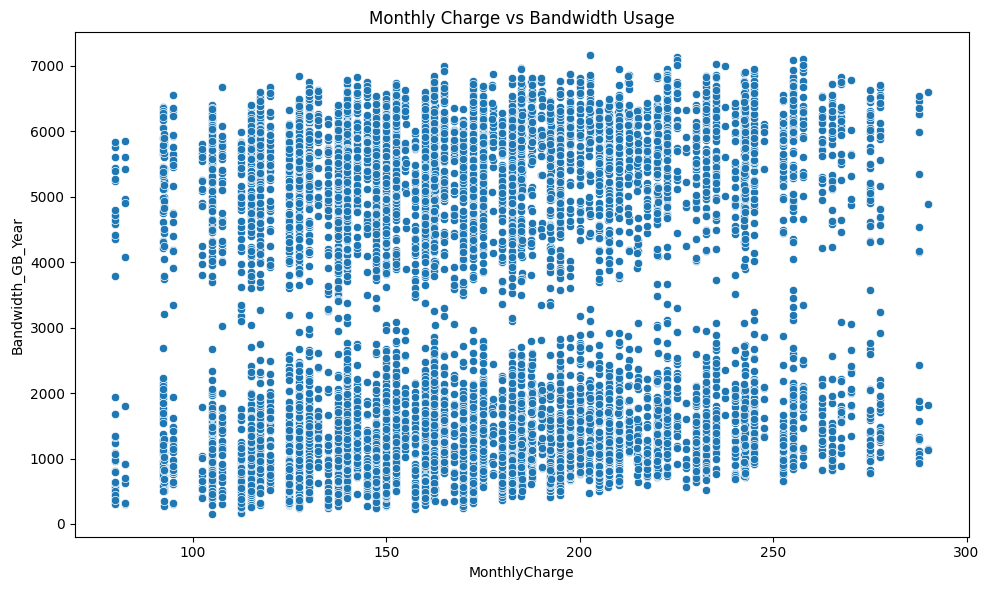

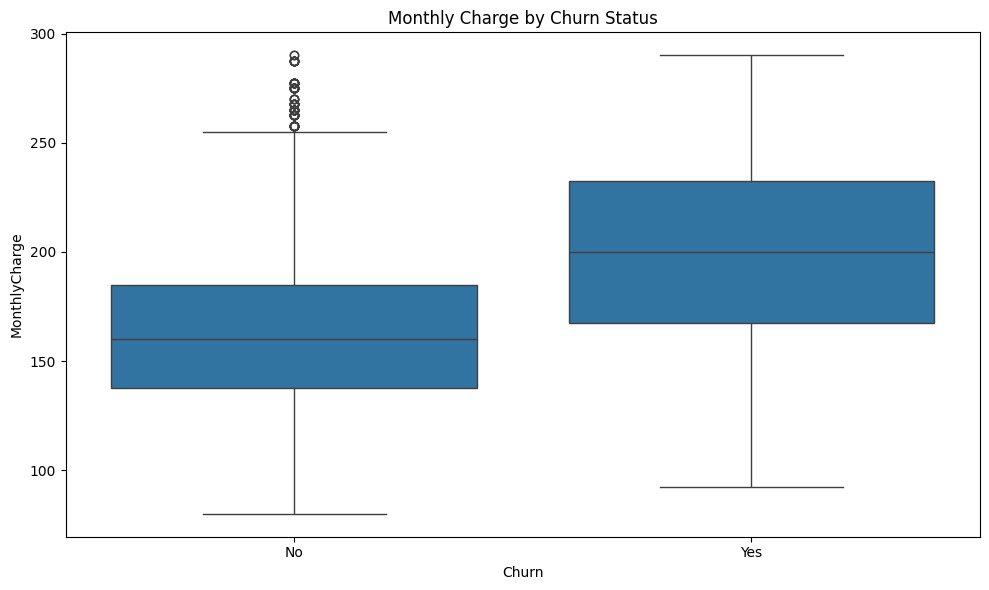

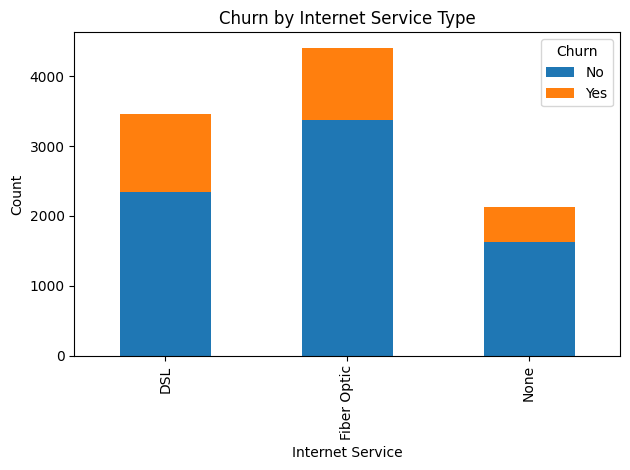

In [15]:
# see attached codes

# Bivariate Analysis: Continuous vs. Continuous
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyCharge', y='Bandwidth_GB_Year')
plt.title('Monthly Charge vs Bandwidth Usage')
plt.tight_layout()
plt.show()

# Bivariate Analysis: Continuous vs. Categorical
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharge')
plt.title('Monthly Charge by Churn Status')
plt.tight_layout()
plt.show()

# Bivariate Analysis: Categorical vs. Categorical
ct = pd.crosstab(df['InternetService'], df['Churn'])
ct.plot(kind='bar', stacked=True)
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Sewell, W. (2023)

The above plots shows relationship of a variables from the Churn dataset. These plots cover 4 variables:

*    'MonthlyCharge' (continuous)
*    'Bandwidth_GB_Year' (continuous)
*    'Churn' (categorical)
*    'InternetService' (categorical)


#### Bivariate Analysis: Continuous vs. Continuous

* The scatterplot provided visualizes the relationship between Monthly Charge and Bandwidth Usage. While the points are distributed across the chart without a clear linear pattern, we can discern a broad trend where customers with higher bandwidth usage also tend to have higher monthly charges. This could suggest that customers who use more data may be on plans that cost more.

#### Bivariate Analysis: Continuous vs. Categorical

* The boxplot examining Monthly Charge by Churn Status reveals a distribution with a slightly higher median charge for customers who have churned. This could indicate a tendency for customers experiencing higher monthly charges to leave the service, potentially highlighting price sensitivity as a contributing factor to churn. The wider interquartile range for churned customers suggests greater variability in how much they are charged compared to those who have not churned.

#### Bivariate Analysis: Categorical vs. Categorical

* In the bar chart comparing Churn by InternetService Type, we see the distribution of churn across different service types. While Fiber Optic users constitute the majority of the service type and the churn. The proportion of churn is significant across all types. This suggests that churn is a common issue regardless of the service type.

#### E1 Results of the Hypothesis Test

##### Hypotheses:

*    Null Hypothesis (H0): There is no difference in the mean monthly charges between customers who churn and those who do not.
        H0: μ_churn = μ_no churn

*    Alternative Hypothesis (H1): There is a difference in the mean monthly charges between customers who churn and those who do not.
        H1: μ_churn ≠ μ_no churn

T-test Results: The T-test conducted to compare the monthly charges between customers who churn and those who do not yielded a statistic of approximately 39.29 and a p-value of 1.78e-290. This indicates a statistically significant difference in the monthly charges between the two groups. The result strongly suggests that higher monthly charges are associated with increased customer churn.

#### E2 Limitations of Your Data Analysis

Limitations: While the analysis provides critical insights, it's important to consider its limitations. These may include the dataset's scope (timeframe, geographic coverage), potential biases in data collection, the exclusion of certain relevant variables, and the assumptions inherent in statistical tests like the T-test. Understanding these limitations helps us contextualize the findings and show us a better understanding of our results. It also helps in figuring out how and where these results can be realistically used or applied.

#### E3 Recommend a Course of Action Based

Based on the results of my findings. I recommend the below points to help us retain the customers.

*    Pricing Strategy Review: Given the significant impact of monthly charges on customer churn, a re-evaluation of the pricing strategy is recommended to find a balance that maximizes customer retention without significantly affecting profitability.
*    Targeted Customer Engagement: Engage customers with higher monthly charges more proactively, as they are more likely to churn.
*    Customized Offers: Develop tailored offers or discounts for segments at higher churn risk, identified through the analysis.
*    Continuous Monitoring: Regularly monitor churn rates and customer feedback to assess the effectiveness of implemented strategies and make adjustments as needed.

These recommendations aim to address the identified issue of customer churn related to monthly charges, thereby improving customer retention and keep them satisfied with our services.

#### F. Panopto video

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=4c05183f-fd20-4ed9-a85f-b11601775911

#### G. Third-Party Code Reference

no third party code were used.

Sewell, W. (2023) was used for Python code idea for the C1 and D1 section of this paper.

#### H. Citation

D207 T-Test-Python-pdf. (2023). [T-Test-Python-pdf]. Retrieved from https://srm.file.force.com/servlet/fileField?id=0BE3x000000gLO7

Sewell, W. (2023). D207 Exploratory Data Analysis Webinar. SharePoint. https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/EbIWOqJp0oJFrByVqCO5wfgB7LHdWLxGgzYyHXd2nuIV2Q?e=PrgdzD
